# Classificação de imagens Landsat-8/OLI utilizando árvore de decisão

Este projeto realiza a classificação de imagens Landsat-8/OLI utilizando o algoritmo de *machine learning* Árvore de decisão.

Grupo:
    - Carlos Augusto dos Santos Neto;
    - Felipe Menino Carlos;
    - Maurício Yassunaga;
    - Weslei Luiz de Paula Pinto.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## Carregando os dados que serão classificados

Nesta etapa os dados são carregados e separados.

In [2]:
dados1 = pd.read_csv("../2_tratamento_dos_dados_escolhidos/saidas/tabela_de_atributos1.csv"); del dados1["Unnamed: 0"]
dados2 = pd.read_csv("../2_tratamento_dos_dados_escolhidos/saidas/tabela_de_atributos2.csv"); del dados2["Unnamed: 0"]

In [3]:
dados = pd.concat([dados1, dados2])

## Separando os dados

Aqui os dados serão separados em treino e teste

In [4]:
RANDOM_STATE = 567

dados_treino, dados_teste = train_test_split(dados, test_size=0.3, random_state=RANDOM_STATE)

In [5]:
dados_treino.head()

B1      B2      B3      B4      B5      B6      B7      B8      B9  \
1865  1.0076  0.9434  0.9339  0.9919  1.4700  1.8086  1.2535  0.7525  0.5030   
307   0.9956  0.8984  0.8571  0.7344  1.6182  1.0056  0.7037  0.0000  0.5027   
154   1.1894  1.1068  1.0014  0.9509  0.9306  0.8599  0.7799  1.1179  0.5059   
1900  1.0521  0.9412  0.8691  0.7337  2.1525  1.2049  0.7529  0.0000  0.5040   
528   1.0215  0.9337  0.8443  0.8095  0.6513  0.5884  0.5629  0.7211  0.5022   

         B10     B11    classe  
1865  2.9652  2.6161  Não-Água  
307   2.6844  2.4245      Água  
154   2.7491  2.4746      Água  
1900  2.7769  2.4858  Não-Água  
528   2.6938  2.4255      Água

In [6]:
classes = dados_treino["classe"]
bandas = dados_treino[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']] # , 'B7', 'B8', 'B9', 'B10', 'B11'

## Definição de utilitários

In [7]:
def generate_tree(tree, data, classes) -> DecisionTreeClassifier:
    """Função para treinar a árvore de decisão
    """
    
    return tree.fit(data, classes)

In [8]:
from graphviz import Source


def plot_tree(tree) -> Source:
    """Função para plotar a estrutura da árvore de decisão
    """
    
    return Source(export_graphviz(tree,  
                        filled=True, rounded=True,
                        special_characters=True, feature_names = bandas.columns, 
                        class_names=list(set(classes)), out_file=None))


def render_tree(source, filename) -> None:
    """Função para renderizar uma árvore de decisão gerada para um arquivo pdf
    """

    pt = plot_tree(source)
    pt.render(filename=f"res/{filename}")
    
    return pt

## Treinamento e teste

Nesta seção os diferentes parâmetros da árvore de decisão serão testados para avaliar as melhores formas de árvore de decisão para o escopo do problema que está sendo tratado.

In [9]:
# Definições gerais
MIN_SAMPLES_LEAF = [268, 350] # MSL
MIN_SAMPLES_SPLIT = [0.7, 600, 1000] # MSS

MAX_LEAF_NODES = [4, 5, 6] # MLN
SPLITTER = "random"

ARVORES_CRIADAS = {"msl": [], "mss": [], "mln": [], "splitter_mln": []}

### Testando parâmetros

Como forma de complementar o treinamento e teste, aqui faz-se a utilização de diferentes parâmetros para a avaliação da árvore de decisão

#### Parâmetro - min_samples_leaf

In [10]:
for msl in MIN_SAMPLES_LEAF:
    ARVORES_CRIADAS["msl"].append(generate_tree(
        DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE, 
                                                                   min_samples_leaf=msl),
        bandas, classes
    ))

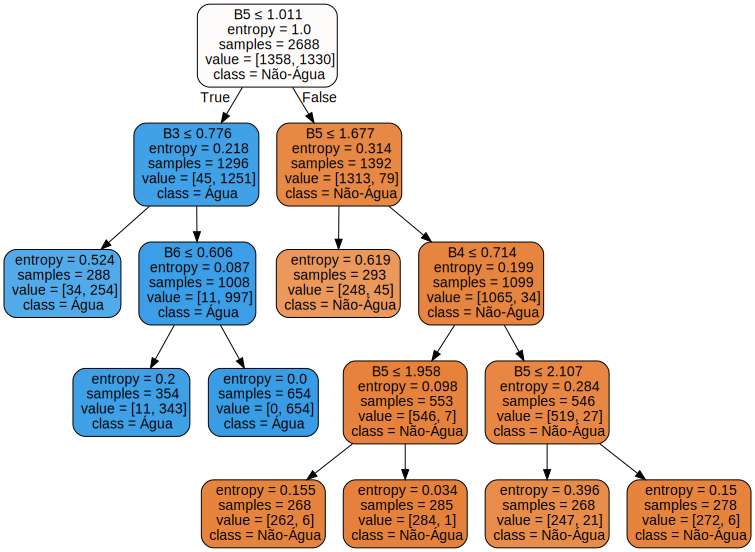

In [11]:
render_tree(ARVORES_CRIADAS["msl"][0], "arvore_1")

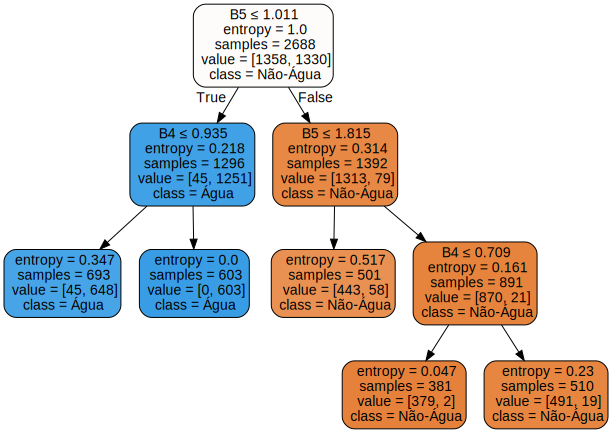

In [12]:
render_tree(ARVORES_CRIADAS["msl"][1], "arvore_2")

#### Parâmetro - min_samples_split

Testando as causas da variação do parâmetro `min_samples_split`

In [13]:
for mss in MIN_SAMPLES_SPLIT:
    ARVORES_CRIADAS["mss"].append(generate_tree(
        DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE, 
                                                                   min_samples_split=mss),
        bandas, classes
    ))

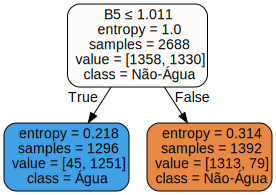

In [14]:
render_tree(ARVORES_CRIADAS["mss"][0], "arvore_3")

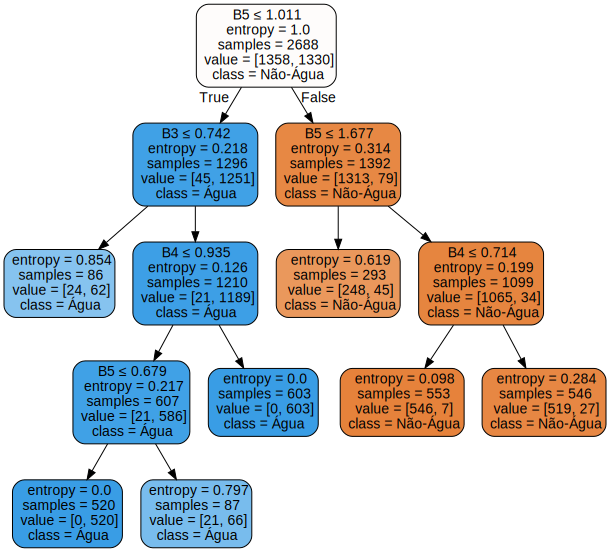

In [15]:
render_tree(ARVORES_CRIADAS["mss"][1], "arvore_4")

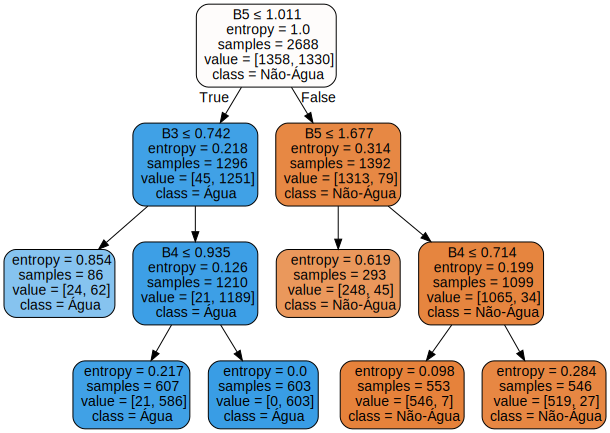

In [16]:
render_tree(ARVORES_CRIADAS["mss"][2], "arvore_5")

#### Parâmetro - max_leaf_nodes

Testando as causas da variação do parâmetro `max_leaf_nodes`

In [17]:
for mln in MAX_LEAF_NODES:
    ARVORES_CRIADAS["mln"].append(generate_tree(
        DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE, 
                                                                   max_leaf_nodes=mln),
        bandas, classes
    ))

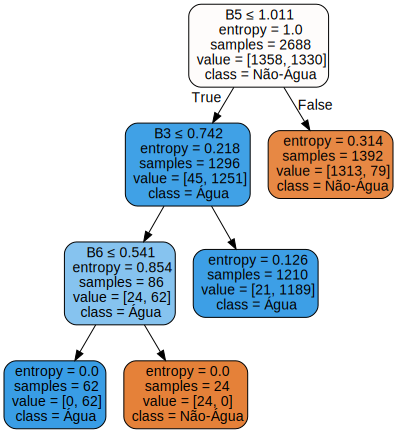

In [18]:
render_tree(ARVORES_CRIADAS["mln"][0], "arvore_6")

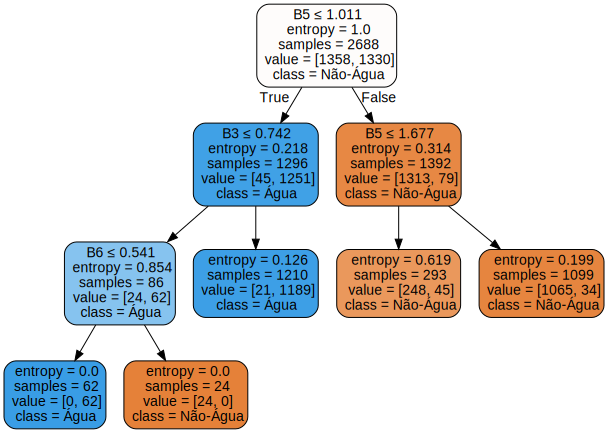

In [19]:
render_tree(ARVORES_CRIADAS["mln"][1], "arvore_7")

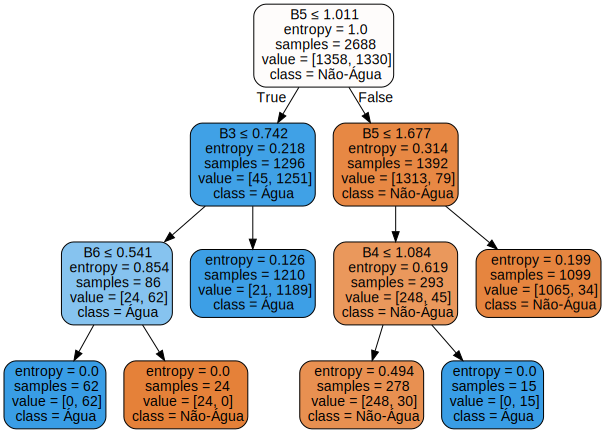

In [20]:
render_tree(ARVORES_CRIADAS["mln"][2], "arvore_8")

#### Parâmetro - splitter & max_leaf_nodes

Testando as causas da variação dos parâmetros `splitter` & `max_leaf_nodes`

In [21]:
ARVORES_CRIADAS["splitter_mln"].append(
    generate_tree(
            DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE,
                                            splitter=SPLITTER, max_leaf_nodes=MAX_LEAF_NODES[0]),
            bandas, classes
        )
)

ARVORES_CRIADAS["splitter_mln"].append(
    generate_tree(
            DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE,
                                            splitter=SPLITTER, max_leaf_nodes=MAX_LEAF_NODES[1]),
            bandas, classes
        )
)

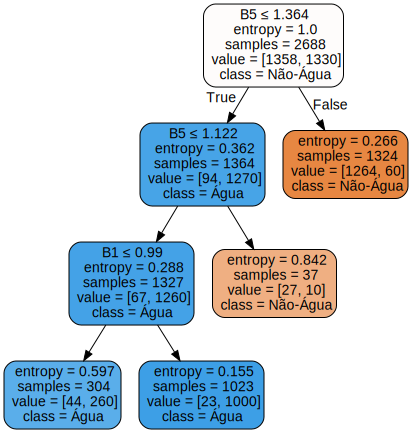

In [22]:
render_tree(ARVORES_CRIADAS["splitter_mln"][0], "arvore_9")

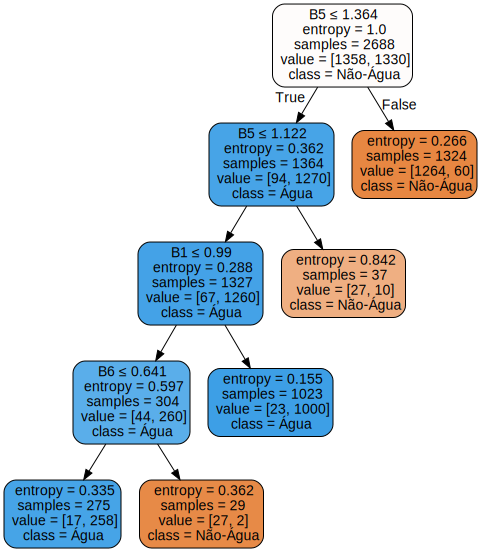

In [23]:
render_tree(ARVORES_CRIADAS["splitter_mln"][1], "arvore_10")

### Testes dos modelos

Aqui todos os modelos e suas variações serão avaliados com os dados de teste

In [24]:
classes_teste = dados_teste["classe"]
bandas_teste = dados_teste[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']]

In [25]:
a = 1
for key in ARVORES_CRIADAS.keys():
    for arvore_treinada in ARVORES_CRIADAS[key]:
        s_temp = arvore_treinada.score(bandas_teste, classes_teste) * 100
        
        print(f"{key} - arvore_{str(a)} - Score: {s_temp}"); a += 1

msl - arvore_1 - Score: 96.09375
msl - arvore_2 - Score: 96.09375
mss - arvore_3 - Score: 96.09375
mss - arvore_4 - Score: 96.09375
mss - arvore_5 - Score: 96.09375
mln - arvore_6 - Score: 96.78819444444444
mln - arvore_7 - Score: 96.78819444444444
mln - arvore_8 - Score: 97.22222222222221
splitter_mln - arvore_9 - Score: 96.00694444444444
splitter_mln - arvore_10 - Score: 96.96180555555556


#### Matriz de confusão

Os quatro melhores modelos serão utilizados para a geração da matriz de confusão. Veja que, aqui é considerado melhor o modelo que possui um `Score` alto e mesmo assim não se manteve complexo.

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
# Recuperando as árvores selecionadas
arvore_3 = ARVORES_CRIADAS["mss"][0]
arvore_6 = ARVORES_CRIADAS["mln"][0]
arvore_9 = ARVORES_CRIADAS["splitter_mln"][0]
arvore_10 = ARVORES_CRIADAS["splitter_mln"][1]

arvores_selecionadas = [
    arvore_3, arvore_6, arvore_9, arvore_10
]

##### Recuperando os dados de teste

In [28]:
cls = ["Água", "Não Água"]
classes_teste = dados_teste["classe"]
bandas_teste = dados_teste[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']]

#####  Criando a matriz de confusão para cada um dos modelos selecionados

In [29]:
matrizes = []; scores = []

In [30]:
for arvore in arvores_selecionadas:
    matrizes.append(
        pd.DataFrame(confusion_matrix(classes_teste, arvore.predict(bandas_teste)), index=cls, columns=cls)
    ); scores.append(arvore.score(bandas_teste, classes_teste) * 100)

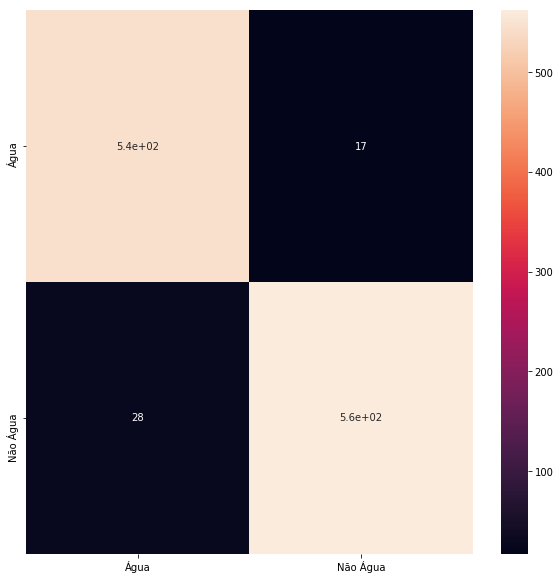

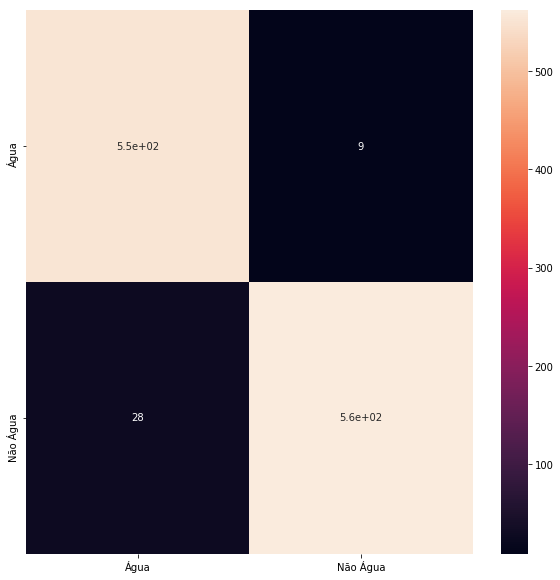

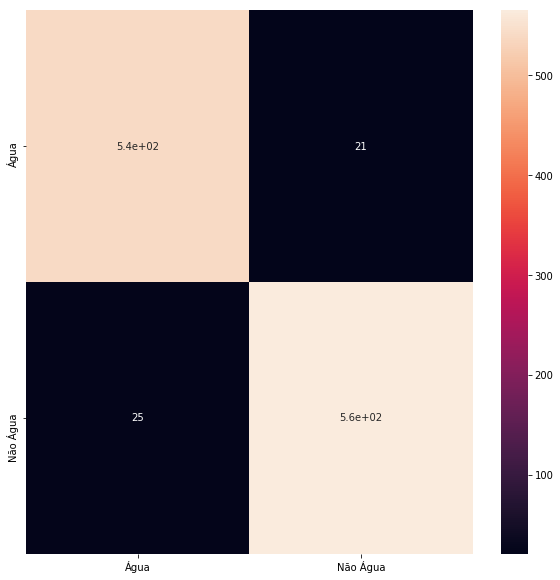

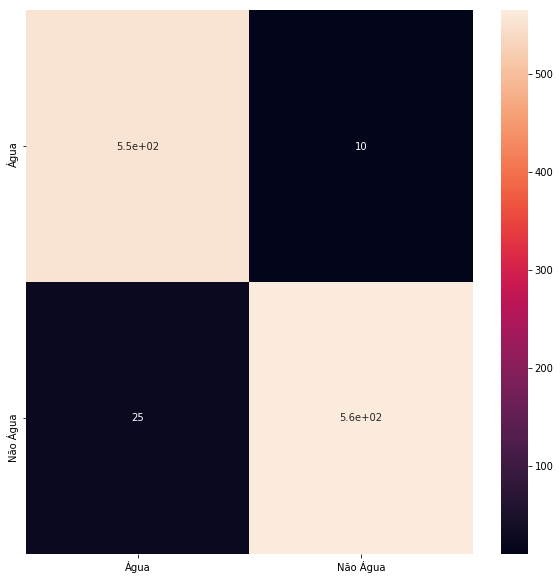

In [31]:
for i in matrizes:    
    plt.figure(figsize=(10, 10))
    sn.heatmap(i, annot=True)

##### Scores

Score de predições de cada modelo 

In [32]:
for s in scores: print(s)

96.09375
96.78819444444444
96.00694444444444
96.96180555555556


#### Avaliação de generalização

Acima os modelos inicialmente apresentado com os melhores foram avaliados, e com esta análise foi possível perceber que, o modelo `mln_0` possui os melhores resultados já que, mesmo com um conjunto simples de regras criadas, sem grandes problemas de altas quantidades de entropia, assim este foi selecionado para a etapa de validação.

In [33]:
dados_outra_imagem = pd.read_csv("../2_tratamento_dos_dados_escolhidos/saidas/tabela_de_atributos_imagem_diferente.csv")

del dados_outra_imagem["Unnamed: 0"]

In [34]:
dados_teste, _ = train_test_split(dados_outra_imagem, test_size=0, random_state=RANDOM_STATE)

In [35]:
dados_teste.head()

B1      B2      B3      B4      B5      B6      B7      B8      B9  \
218  0.9283  0.8311  0.7244  0.6436  0.5684  0.5298  0.5215  0.8050  0.5025   
164  0.9270  0.8298  0.7364  0.6461  0.5642  0.5226  0.5138  0.7065  0.5037   
186  0.9078  0.8133  0.7152  0.6250  0.5580  0.5160  0.5082  0.8020  0.5022   
375  0.8963  0.8030  0.7377  0.6330  1.6951  1.0208  0.6817  0.7143  0.5037   
101  0.9058  0.8109  0.7122  0.6354  0.7751  0.6418  0.5694  0.7362  0.5014   

        B10     B11    classe  
218  2.7628  2.4871      Água  
164  2.7768  2.5019      Água  
186  2.7898  2.5192      Água  
375  2.7598  2.4997  Não-Água  
101  2.8300  2.5525      Água

In [36]:
classes_v = dados_teste["classe"]
bandas_v = dados_teste[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']]

##### Scores para a imagem diferente

In [37]:
arvore_6.score(bandas_v, classes_v) * 100

93.90625

##### Matriz de confusão para uma imagem diferente

In [38]:
matriz_de_confusao = pd.DataFrame(confusion_matrix(classes_teste, arvore.predict(bandas_teste)), index=cls, columns=cls)

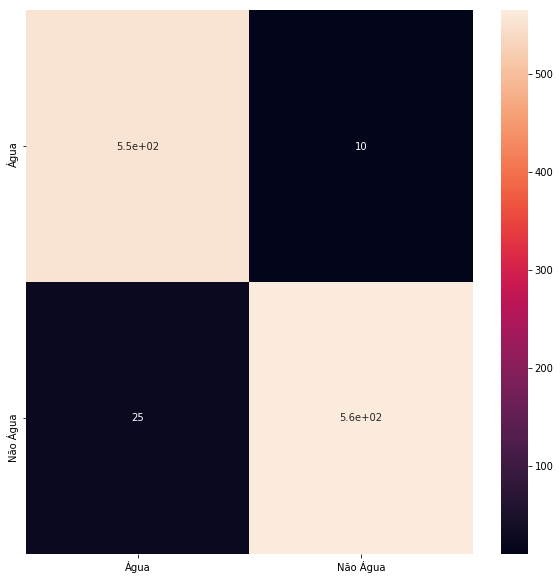

In [39]:
plt.figure(figsize=(10, 10))
sn.heatmap(matriz_de_confusao, annot=True)